In [70]:
import os
import os.path as osp
import glob
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
ROOT = './'

csv_data = glob.glob(f"{osp.join(ROOT, 'data', '*.csv')}")

assert len(csv_data) > 0, "No csv files are found"

print(f"Found {len(csv_data)} csv files")

Found 7 csv files


# Join the CSV files together

In [72]:
AGE_CSV = '/Users/kctey/Desktop/NUS Y4S1/BN4101/UK_Biobank/data/age.csv'

df = None
for filepath in sorted(csv_data)[::-1]:
    if df is None:
        df = pd.read_csv(filepath)
    else:
        tmp_df = pd.read_csv(filepath)
        
        # inner join age dataframe
        if filepath == AGE_CSV:
            how = 'inner'
        else:
            how = 'outer'  # outer join all cognitive tests and use imputation to fill missing values

        df = df.merge(tmp_df, on='eid', how=how)

# Map column names to english

In [73]:
NAME_FILE = 'name_mapping.json'
f = open(NAME_FILE)
name_data = json.load(f)
name_data

{'eid': 'subject_id',
 '21022-0.0': 'age',
 '31-0.0': 'gender',
 '20191-0.0': 'FI_score',
 '20240-0.0': 'Maximum digits remembered correctly',
 'mean_20131': 'Mean Correct Pair',
 'mean_20132': 'Mean Incorrect Pair',
 'mean_20133': 'Mean Completion Time',
 '20159-0.0': 'Correct Digits matched',
 '20195-0.0': 'Digit Match attempts',
 '20156-0.0': 'Total time (numeric trail)',
 '20157-0.0': 'Total time (alphanumeric trail)',
 '20247-0.0': 'Total error (numeric path)',
 '20248-0.0': 'Total error (alphanumeric path)'}

In [74]:
renamed_df = df.rename(columns=name_data)
renamed_df

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,age
0,1000085,43.202,64.591,0.0,0.0,22.0,22.0,4.500000,1.000000,22838.0,9.0,0,6.0,51.0
1,1000158,48.845,96.175,3.0,5.0,5.0,17.0,4.500000,5.000000,35523.0,7.0,0,5.0,60.0
2,1000251,23.656,36.673,0.0,0.0,23.0,24.0,4.500000,4.000000,14591.0,8.0,1,10.0,53.0
3,1000279,25.344,51.384,0.0,1.0,25.0,25.0,5.666667,3.333333,21993.0,8.0,0,4.0,54.0
4,1000295,33.183,52.936,0.0,0.0,21.0,21.0,4.500000,6.000000,32468.0,7.0,0,6.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502406,6024887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,65.0
502407,6024893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,44.0
502408,6024902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,44.0
502409,6024915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,41.0


# Check Data Normality

In [75]:
# FI
# plt.hist(df['20191-0.0'])
# plt.show()

# from scipy.stats import shapiro
# shapiro(df['20191-0.0'].dropna()) # ShapiroResult(statistic=0.9766396880149841, pvalue=0.0)

# from scipy.stats import kstest
# kstest(df['20191-0.0'].dropna(), 'norm') # KstestResult(statistic=0.9823087568599015, pvalue=0.0)


# Handle missing values

In [76]:
print(f"Data extracted has {len(renamed_df)} rows")

# Total 11 cognitive tests, (does not count eid and 21022)
# only keep record if user has taken more than 5 tests (7 non-NaN columns)
renamed_df = renamed_df.dropna(thresh=7)
renamed_df

Data extracted has 502411 rows


,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,age
0,1000085,43.202,64.591,0.0,0.0,22.0,22.0,4.500000,1.000000,22838.000000,9.0,0,6.0,51.0
1,1000158,48.845,96.175,3.0,5.0,5.0,17.0,4.500000,5.000000,35523.000000,7.0,0,5.0,60.0
2,1000251,23.656,36.673,0.0,0.0,23.0,24.0,4.500000,4.000000,14591.000000,8.0,1,10.0,53.0
3,1000279,25.344,51.384,0.0,1.0,25.0,25.0,5.666667,3.333333,21993.000000,8.0,0,4.0,54.0
4,1000295,33.183,52.936,0.0,0.0,21.0,21.0,4.500000,6.000000,32468.000000,7.0,0,6.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121838,6009918,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,6.000000,36960.000000,4.0,1,2.0,64.0
121839,6011793,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,2.000000,16046.500000,7.0,0,6.0,66.0
121840,6014311,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,6.500000,64201.000000,5.0,1,4.0,55.0
121841,6014493,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,2.000000,21785.000000,6.0,0,6.0,64.0


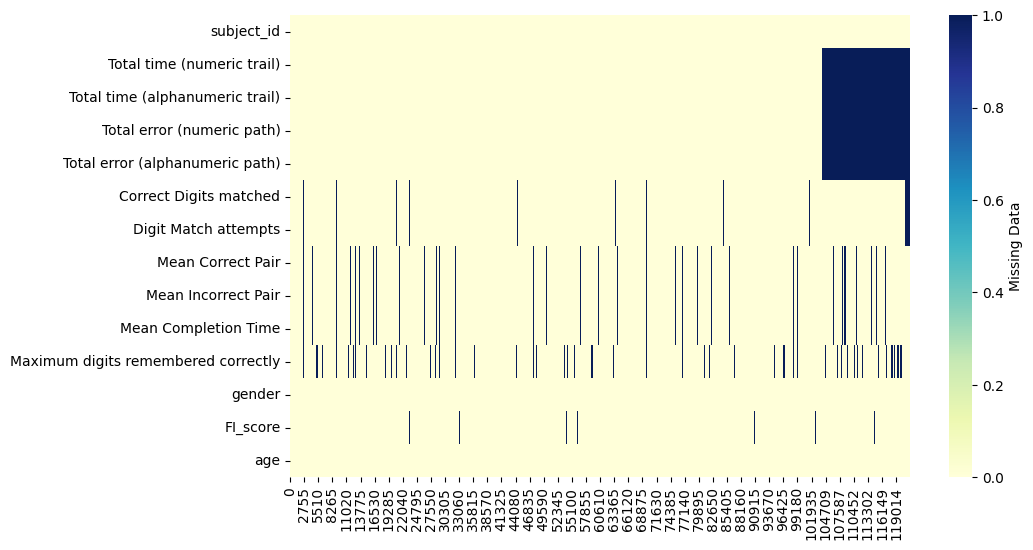

In [77]:
# check missingness to decide which to drop
plt.figure(figsize=(10,6))
sns.heatmap(renamed_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

# Plot Distribution of Numerical Variable

<AxesSubplot:>

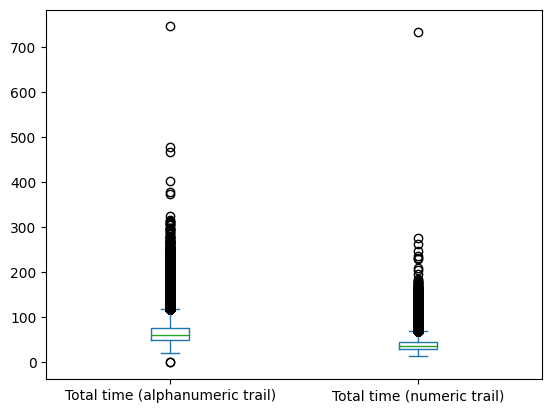

In [78]:
# Total time for trail_making
renamed_df[['Total time (alphanumeric trail)', 'Total time (numeric trail)']].plot.box()

# spotted two outlier (1 in each variable)

In [79]:
max_alpha_time = max(renamed_df['Total time (alphanumeric trail)'])
max_numeric_time = max(renamed_df['Total time (numeric trail)'])
renamed_df[(renamed_df['Total time (alphanumeric trail)'] == max_alpha_time) | 
            (renamed_df['Total time (numeric trail)'] == max_numeric_time)]

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,age
36190,2730669,733.970,268.098,236.0,147.0,13.0,13.0,4.5,5.0,37940.5,8.0,1,7.0,61.0
55096,3647765,62.978,746.531,0.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,0,6.0,54.0


<AxesSubplot:>

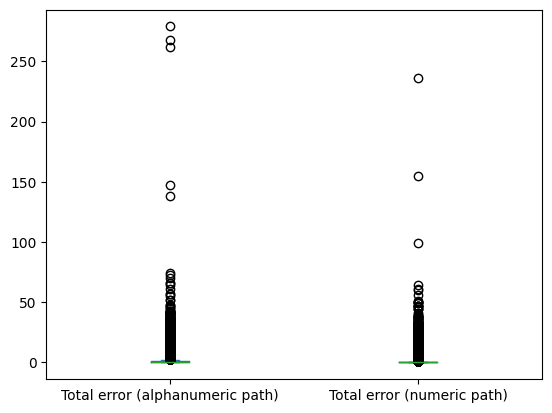

In [80]:
# Total error for trail_making
renamed_df[['Total error (alphanumeric path)', 'Total error (numeric path)']].plot.box()

# a few obvious outliers

In [85]:
top_alpha_outliers = renamed_df['Total error (alphanumeric path)'].sort_values(ascending=False)[:5]
top_numeric_outliers = renamed_df['Total error (numeric path)'].sort_values(ascending=False)[:5]
renamed_df[(renamed_df['Total error (alphanumeric path)'].isin(top_alpha_outliers)) | 
            (renamed_df['Total error (numeric path)'].isin(top_numeric_outliers))]

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,age
11265,1539777,74.4680,63.504,61.0,31.0,16.0,24.0,4.5,5.5,14826.5,6.0,0,4.0,42.0
12206,1583898,111.5670,35.208,64.0,0.0,23.0,23.0,4.5,4.0,23564.5,9.0,0,10.0,58.0
19918,1958923,43.8120,173.842,0.0,138.0,19.0,19.0,4.5,4.0,21173.0,3.0,0,6.0,52.0
36190,2730669,733.9700,268.098,236.0,147.0,13.0,13.0,4.5,5.0,37940.5,8.0,1,7.0,61.0
36560,2747840,45.2000,477.728,0.0,262.0,16.0,16.0,4.5,2.0,15727.5,NaN,0,NaN,62.0
55096,3647765,62.9780,746.531,0.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,0,6.0,54.0
70881,4411665,28.8400,467.727,0.0,268.0,17.0,17.0,4.5,5.0,26558.0,8.0,0,4.0,54.0
77525,4736387,30.8573,90.191,155.0,1.0,21.0,21.0,4.5,10.0,42732.5,7.0,1,4.0,65.0
86922,5194575,86.8104,150.538,99.0,2.0,10.0,11.0,4.5,4.5,38219.0,4.0,1,6.0,64.0


/var/folders/ky/dl08g4ws1rq302s4gkqyh6cr0000gn/T/ipykernel_46457/4053338011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renamed_df['Digit Substitution Accuracy'] = renamed_df['Correct Digits matched']/renamed_df['Digit Match attempts']


<AxesSubplot:>

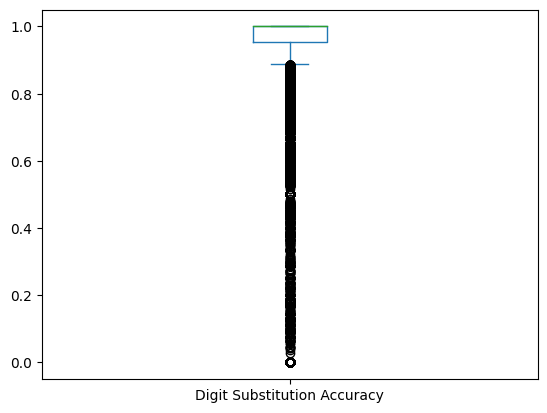

In [89]:
# symbol_digit_substitution
renamed_df['Digit Substitution Accuracy'] = renamed_df['Correct Digits matched']/renamed_df['Digit Match attempts']
renamed_df[['Digit Substitution Accuracy']].plot.box()

In [91]:
renamed_df.sort_values('Digit Substitution Accuracy', ascending=False).dropna()

,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,age,Digit Substitution Accuracy
0,1000085,43.202,64.591,0.0,0.0,22.0,22.0,4.5,1.0,22838.0,9.0,0,6.0,51.0,1.0
61273,3948876,21.058,39.118,0.0,0.0,26.0,26.0,4.5,1.5,10886.5,9.0,1,8.0,53.0,1.0
61282,3949241,33.632,41.184,0.0,0.0,23.0,23.0,4.5,1.5,15348.0,8.0,0,9.0,45.0,1.0
103322,5991682,54.232,106.257,0.0,3.0,11.0,11.0,4.5,1.5,20597.0,7.0,0,4.0,59.0,1.0
61279,3949126,57.397,79.984,1.0,0.0,19.0,19.0,4.5,3.0,22436.5,8.0,1,8.0,55.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90096,5347346,51.531,85.238,0.0,0.0,0.0,3.0,4.5,3.5,34600.0,8.0,1,4.0,62.0,0.0
11626,1555907,57.859,113.785,1.0,6.0,0.0,2.0,4.5,2.0,28667.0,5.0,0,4.0,67.0,0.0
43294,3069901,31.930,76.649,0.0,1.0,0.0,5.0,4.5,2.5,26753.0,6.0,0,4.0,62.0,0.0
30040,2438208,64.712,292.505,0.0,44.0,0.0,6.0,4.5,18.0,57400.5,2.0,1,4.0,65.0,0.0


In [117]:
print(f"{len(renamed_df[renamed_df['Digit Match attempts'] == 1.0])} participants only made 1 matching attempt in symbol digit substitution")
print(f"Average attempts made are {renamed_df['Digit Match attempts'].mean()}")
print(f"Participants are at least given {renamed_df['Digit Match attempts'].min()} matches")
print(f"Participants are given at most {renamed_df['Digit Match attempts'].max()} matches")

56 participants only made 1 matching attempt in symbol digit substitution
Average attempts made are 20.290343387707296
Participants are at least given 1.0 matches
Participants are given at most 109.0 matches


In [112]:
renamed_df['Digit Match attempts'].value_counts()

24.0     12602
21.0      9801
16.0      9397
22.0      9275
20.0      9226
         ...  
86.0         1
94.0         1
80.0         1
45.0         1
104.0        1
Name: Digit Match attempts, Length: 61, dtype: int64

(0.0, 110.0)

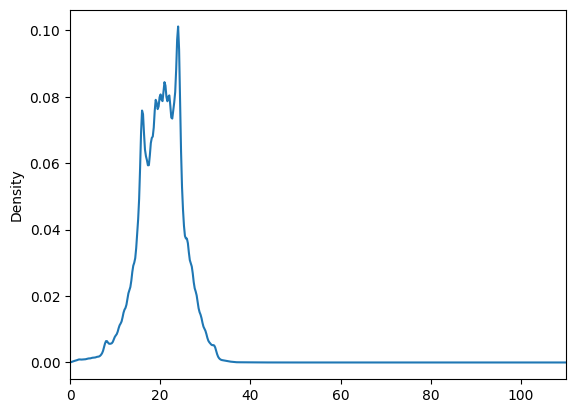

In [114]:
renamed_df['Digit Match attempts'].plot.density()
plt.xlim(renamed_df['Digit Match attempts'].min() - 1, renamed_df['Digit Match attempts'].max() + 1)

<AxesSubplot:>

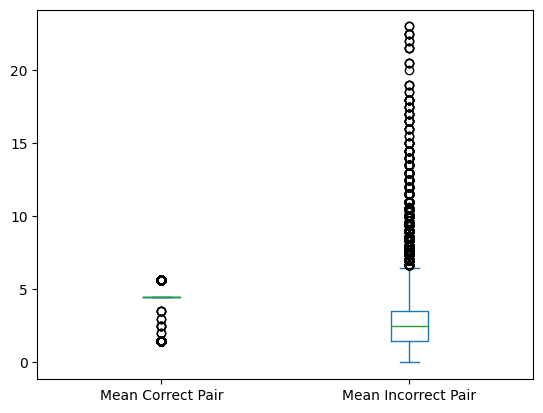

In [101]:
# Pair Matching
# Mean correct/incorrect/completion time

# Check outlier incorrect and correct
# Check outlier completion time

renamed_df[['Mean Correct Pair', 'Mean Incorrect Pair']].plot.box()

<AxesSubplot:>

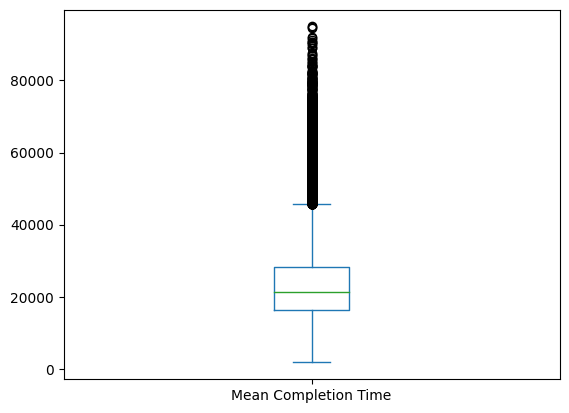

In [102]:
renamed_df['Mean Completion Time'].plot.box()

In [122]:
# check those with very high completion time 
print(f"Average completion time is ", renamed_df['Mean Completion Time'].mean())
print(f"Average Correct pair is ", renamed_df['Mean Correct Pair'].mean())
print(f"Average Incorrect Pair is ", renamed_df['Mean Incorrect Pair'].mean())

renamed_df.sort_values('Mean Completion Time', ascending=False)[:20]

Average completion time is  23486.559746957457
Average Correct pair is  4.631290349578504
Average Incorrect Pair is  2.788137476443205


,subject_id,Total time (numeric trail),Total time (alphanumeric trail),Total error (numeric path),Total error (alphanumeric path),Correct Digits matched,Digit Match attempts,Mean Correct Pair,Mean Incorrect Pair,Mean Completion Time,Maximum digits remembered correctly,gender,FI_score,age,Digit Substitution Accuracy
118755,5386189,NaN,NaN,NaN,NaN,0.0,14.0,4.5,4.5,94984.0,5.0,0,5.0,68.0,0.000000
120377,5879067,NaN,NaN,NaN,NaN,14.0,16.0,4.5,10.0,94799.5,NaN,1,4.0,67.0,0.875000
116857,4833827,NaN,NaN,NaN,NaN,16.0,16.0,4.5,13.0,94516.5,6.0,1,4.0,58.0,1.000000
38808,2856528,82.976,100.688,1.0,0.0,10.0,10.0,4.5,5.0,92039.5,6.0,1,5.0,68.0,1.000000
116981,4871679,NaN,NaN,NaN,NaN,14.0,14.0,4.5,7.5,91783.5,7.0,0,4.0,58.0,1.000000
47860,3295196,72.225,145.285,0.0,11.0,8.0,8.0,4.5,7.5,91106.0,NaN,0,2.0,60.0,1.000000
114594,4157902,NaN,NaN,NaN,NaN,8.0,8.0,4.5,6.5,90722.5,2.0,0,3.0,62.0,1.000000
121733,5465240,NaN,NaN,NaN,NaN,NaN,NaN,4.5,4.0,90609.0,NaN,1,4.0,64.0,NaN
6472,1310533,66.318,107.561,0.0,1.0,16.0,16.0,4.5,9.0,90396.5,9.0,0,3.0,45.0,1.000000
118765,5388911,NaN,NaN,NaN,NaN,7.0,7.0,4.5,3.0,90024.0,3.0,0,4.0,63.0,1.000000


<AxesSubplot:>

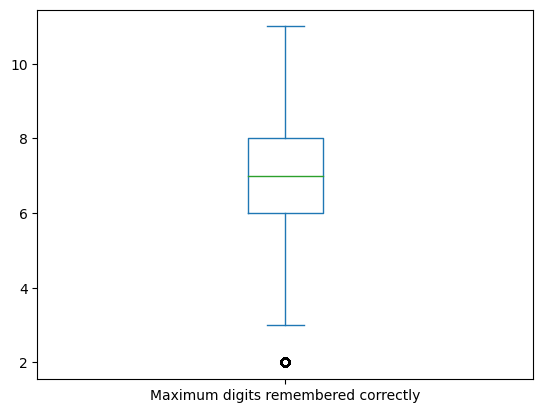

In [103]:
# numeric memory
renamed_df['Maximum digits remembered correctly'].plot.box()

In [105]:
# Fluid Intelligence
renamed_df['FI_score'].value_counts()

7.0     23034
6.0     20255
8.0     20114
5.0     18469
4.0     13276
9.0      7692
3.0      6077
10.0     5203
11.0     2360
2.0      1595
12.0     1032
0.0       206
1.0       153
13.0      101
14.0        7
Name: FI_score, dtype: int64

# Significance of each variable against age and gender

In [10]:
# check distribution of age and gender in original dataframe

# 25-54 years (prime working age): 39.67% (male 13,339,965/female 12,747,598), total = 26087563
# M percentage = 

# 55-64 years (mature working age): 12.73% (male 4,139,378/female 4,234,701)
# M:F ratio = 0.977: 1

# 65 years and over (elderly): 18.48% (male 5,470,116/female 6,681,311) (2020 est.)
# M:F ratio = 0.819: 1

age_gender = df.copy()[['21022-0.0', '31-0.0']]

def age_group(age):
    if age < 25:
        raise Exception('Age out of range')
    if age >= 25 and age <= 54:
        return 'Prime'
    elif age <= 64:
        return 'Mature'
    else:
        return 'Elderly'

age_gender['age_group'] = age_gender['21022-0.0'].apply(age_group)

# convert age group column to categorical
age_gender['age_group'] = age_gender['age_group'].astype(str)  

In [22]:
print(age_gender['31-0.0'].value_counts())
age_gender['age_group'].value_counts()

0    67999
1    53207
Name: 31-0.0, dtype: int64


Mature     55259
Prime      47926
Elderly    18021
Name: age_group, dtype: int64

In [27]:
# Numeric Memory
df.describe()

,eid,20156-0.0,20157-0.0,20247-0.0,20248-0.0,20159-0.0,20195-0.0,mean_20131,mean_20132,mean_20133,20240-0.0,31-0.0,20191-0.0,21022-0.0
count,1.212060e+05,104014.000000,104014.000000,104014.000000,104014.000000,117826.000000,117826.000000,115501.000000,115501.000000,115501.000000,110775.000000,121206.000000,119574.000000,121206.000000
mean,3.505635e+06,39.193717,66.803595,0.584219,1.048157,19.706381,20.290343,4.631290,2.788137,23486.559747,6.925534,0.438980,6.453878,56.102487
std,1.450419e+06,14.998772,25.755399,2.316757,3.040445,5.213248,4.841296,0.467201,1.670456,10132.570194,1.484426,0.496265,2.036500,7.723726
min,1.000085e+06,13.666000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000,0.000000,1755.500000,2.000000,0.000000,0.000000,38.000000
25%,2.252104e+06,29.216000,49.584000,0.000000,0.000000,16.000000,17.000000,4.500000,1.500000,16393.500000,6.000000,0.000000,5.000000,50.000000
50%,3.500500e+06,35.693500,61.182500,0.000000,0.000000,20.000000,21.000000,4.500000,2.500000,21348.000000,7.000000,0.000000,6.000000,57.000000
75%,4.762120e+06,45.079000,77.350500,0.000000,1.000000,23.000000,24.000000,4.500000,3.500000,28144.000000,8.000000,1.000000,8.000000,62.000000
max,6.024933e+06,733.970000,746.531000,236.000000,279.000000,103.000000,109.000000,5.666667,23.000000,94984.000000,11.000000,1.000000,14.000000,72.000000


In [6]:
# Pair Matching


In [7]:
# Symbol Digit Substitution


In [8]:
# Trail Making
